In [1]:
using CSV, DataFrames, Gadfly, GLM, Distributions

In [2]:
data = CSV.read("tuition_vs_salary.csv")

,University,Tuition,Salary
1,Harvey Mudd College,50649,157400
2,Massachusetts Institute of Technology,46704,150400
3,Stanford University,46320,143100
4,California Institute of Technology,45390,143100
5,Harvard University,45278,142600
6,Princeton University,43450,141300
7,Yale University,47600,135400
8,University of California-Berkeley,13431,132300
9,Pennsylvania State University-Main Campus,17514,103100
10,Ohio State University-Main Campus,10037,95100


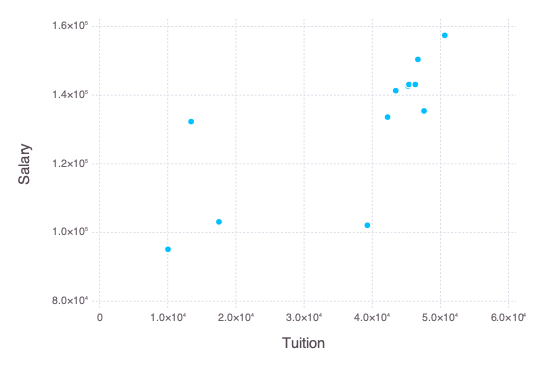

In [3]:
# Traçage des variables explicatives
fig1 = plot(data, x=:Tuition, y=:Salary, Geom.point)

In [4]:
X₁ = collect(skipmissing(data[:Tuition]))
Y = collect(skipmissing(data[:Salary]))
n = length(Y)
X = hcat(ones(n),X₁)
p = size(X,2)-1

1

In [5]:
NITER = 1000

β = zeros(p+1,NITER)
σ² = ones(NITER)

β̂ = (X'X)\X'Y

for iter=2:NITER
   
    J = (X'X)/σ²[iter-1]
    h = J*β̂
    
    β[:,iter] = rand(MvNormalCanon(h, J))
    
    σ²[iter] = rand(InverseGamma((n-p-1)/2,(Y-X*β[:,iter])'*(Y-X*β[:,iter])/2 ))
    
end

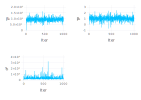

In [6]:

# Traçage des chaînes

MCMC = DataFrame()
MCMC[:Iter] = collect(1:NITER)
MCMC[Symbol("β₀")] = β[1,:]
MCMC[Symbol("β₁")] = β[2,:]
MCMC[Symbol("σ²")] = σ²

fig1 = plot(MCMC, x=:Iter, y="β₀", Geom.line)
fig2 = plot(MCMC, x=:Iter, y="β₁", Geom.line)
fig3 = plot(MCMC, x=:Iter, y="σ²", Geom.line)
vstack(hstack(fig1,fig2),hstack(fig3,Compose.context()))

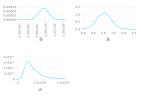

In [7]:
# Traçage des densités a posteriori marginales
fig1 = plot(MCMC, x="β₀", Geom.density, Coord.cartesian(xmin=2.5e4, xmax=1.5e5))
fig2 = plot(MCMC, x="β₁", Geom.density, Coord.cartesian(xmin=0, xmax=2.5))
fig3 = plot(MCMC, x="σ²", Geom.density, Coord.cartesian(xmin=0, xmax=1e9))
vstack(hstack(fig1,fig2),hstack(fig3,Compose.context()))

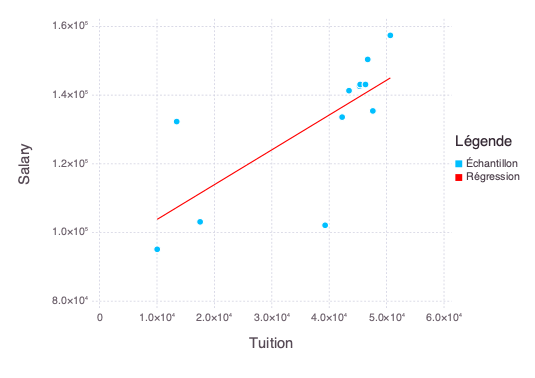

In [8]:
β̂ = mean(β,2)

sample = layer( x=X[:,2], y=Y, Geom.point, Theme(default_color="deepskyblue"))
xx = [ones(10) collect(linspace(minimum(X₁),maximum(X₁),10))]
regression = layer(x=xx[:,2], y = xx*β̂, Geom.line, Theme(default_color="red"))

plot(sample,regression ,
    Guide.manual_color_key("Légende", ["Échantillon", "Régression"], ["deepskyblue","red"]),
    Guide.xlabel("Tuition"), Guide.ylabel("Salary"))
